In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np

In [41]:
df = pd.read_csv("./dataset/COVID_hk_number.csv")
df["As of date"] = pd.to_datetime(df["As of date"], format="%d/%m/%Y")
df

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus
0,2020-01-08,12:00,0.0,21.0,17.0,38.0,0,0,0.0,NaN,NaN
1,2020-01-09,12:00,0.0,25.0,23.0,48.0,0,0,0.0,NaN,NaN
2,2020-01-10,12:00,0.0,31.0,23.0,54.0,0,0,0.0,NaN,NaN
3,2020-01-11,12:00,0.0,46.0,15.0,61.0,0,0,0.0,NaN,NaN
4,2020-01-12,12:00,0.0,51.0,16.0,67.0,0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
779,2022-02-25,NaN,NaN,NaN,NaN,NaN,497,17562,NaN,16.0,94056.0
780,2022-02-26,NaN,NaN,NaN,NaN,NaN,577,17855,NaN,16.0,138955.0
781,2022-02-27,NaN,NaN,NaN,NaN,NaN,659,18236,NaN,16.0,171314.0
782,2022-02-28,NaN,NaN,NaN,NaN,NaN,744,18926,NaN,16.0,205780.0


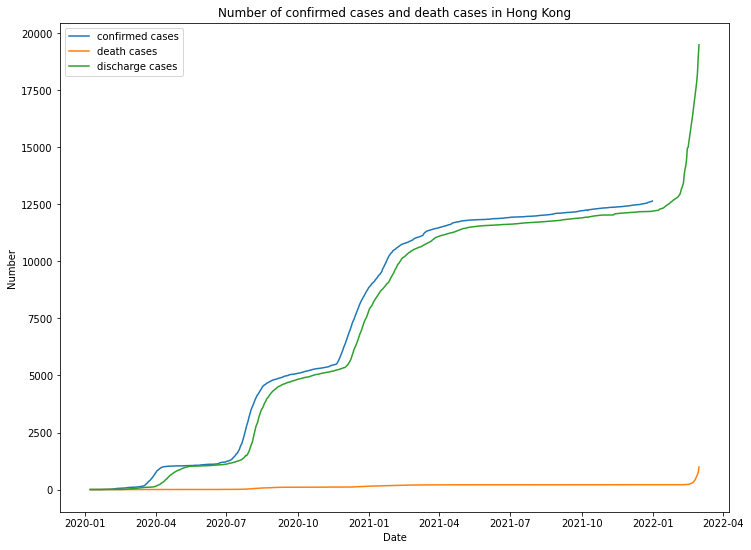

In [42]:
plt.figure(figsize=(12,9))
plt.plot(df["As of date"], df["Number of confirmed cases"],label="confirmed cases")
plt.plot(df["As of date"], df["Number of death cases"],label="death cases")
plt.plot(df["As of date"], df["Number of discharge cases"],label="discharge cases")
plt.title("Number of confirmed cases and death cases in Hong Kong")
plt.xlabel("Date")
plt.ylabel("Number")
plt.legend()

In [43]:
corr = df.corr()
corr

,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus
Number of confirmed cases,1.000000,0.956486,0.401622,0.960357,0.995069,0.997673,0.402734,-0.211222,NaN
Number of ruled out cases,0.956486,1.000000,0.551211,0.999411,0.891136,0.949884,0.731579,NaN,NaN
Number of cases still hospitalised for investigation,0.401622,0.551211,1.000000,0.566329,0.641107,0.515200,0.482102,NaN,NaN
Number of cases fulfilling the reporting criteria,0.960357,0.999411,0.566329,1.000000,0.885474,0.951046,0.724082,NaN,NaN
Number of death cases,0.995069,0.891136,0.641107,0.885474,1.000000,0.945383,0.380199,-0.189834,0.988576
Number of discharge cases,0.997673,0.949884,0.515200,0.951046,0.945383,1.000000,0.385927,-0.282697,0.882679
Number of probable cases,0.402734,0.731579,0.482102,0.724082,0.380199,0.385927,1.000000,NaN,NaN
Number of hospitalised cases in critical condition,-0.211222,NaN,NaN,NaN,-0.189834,-0.282697,NaN,1.000000,0.748480
Number of cases tested positive for SARS-CoV-2 virus,NaN,NaN,NaN,NaN,0.988576,0.882679,NaN,0.748480,1.000000


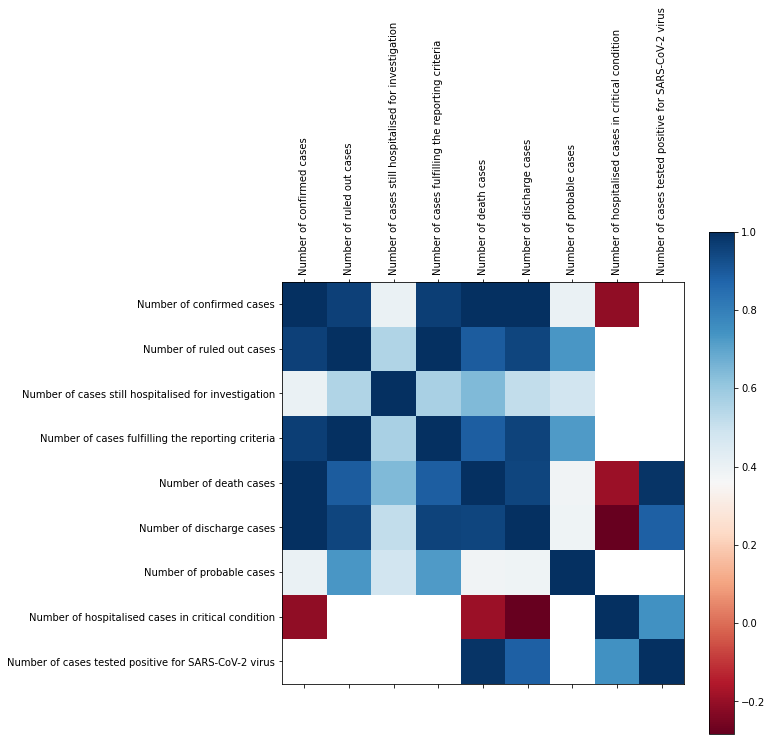

In [44]:
fig = plt.figure(figsize=(9, 9))
plt.matshow(corr, fignum=fig.number, cmap="RdBu")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

In [45]:
df_vaccination = pd.read_csv("dataset/vaccination-rates-over-time-by-age.csv")
df_vaccination["Date"] = pd.to_datetime(df_vaccination["Date"], format="%Y-%m-%d")
df_vaccination

,Date,Age Group,Sex,Sinovac 1st dose,Sinovac 2nd dose,Sinovac 3rd dose,BioNTech 1st dose,BioNTech 2nd dose,BioNTech 3rd dose
0,2021-02-22,30-39,M,1,0,0,0,0,0
1,2021-02-22,40-49,F,1,0,0,0,0,0
2,2021-02-22,40-49,M,11,0,0,0,0,0
3,2021-02-22,50-59,F,2,0,0,0,0,0
4,2021-02-22,50-59,M,10,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5887,2022-02-27,60-69,M,366,272,625,369,370,1684
5888,2022-02-27,70-79,F,426,170,241,250,180,543
5889,2022-02-27,70-79,M,289,128,221,211,149,531
5890,2022-02-27,80 and above,F,503,131,52,175,114,112


## 復必泰

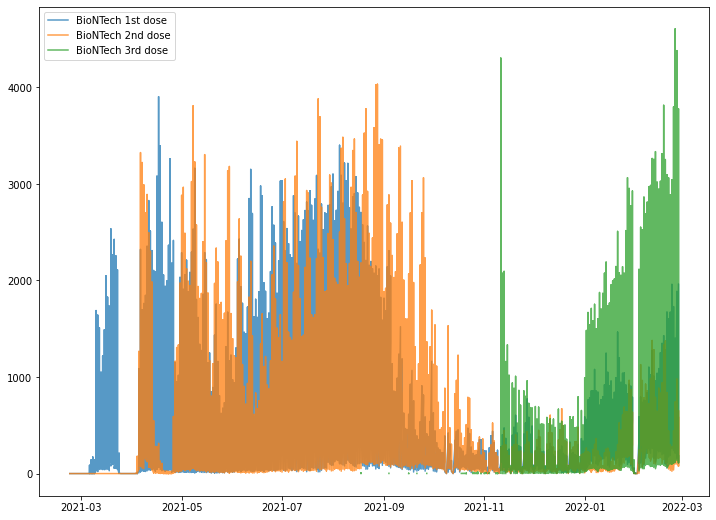

In [48]:
plt.figure(figsize=(12,9))
df_vaccination["BioNTech 3rd dose"].replace(0, np.nan, inplace=True)
plt.plot(df_vaccination["Date"], df_vaccination["BioNTech 1st dose"], label="BioNTech 1st dose",alpha=0.75)
plt.plot(df_vaccination["Date"], df_vaccination["BioNTech 2nd dose"], label="BioNTech 2nd dose",alpha=0.75)
plt.plot(df_vaccination["Date"], df_vaccination["BioNTech 3rd dose"], label="BioNTech 3rd dose",alpha=0.75)
plt.legend()

## 科興

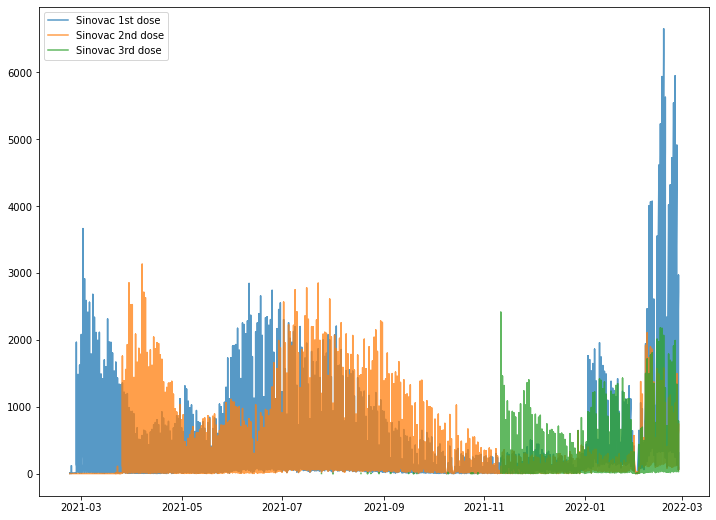

In [49]:
plt.figure(figsize=(12,9))
df_vaccination["Sinovac 3rd dose"].replace(0, np.nan, inplace=True)
plt.plot(df_vaccination["Date"], df_vaccination["Sinovac 1st dose"], label="Sinovac 1st dose",alpha=0.75)
plt.plot(df_vaccination["Date"], df_vaccination["Sinovac 2nd dose"], label="Sinovac 2nd dose",alpha=0.75)
plt.plot(df_vaccination["Date"], df_vaccination["Sinovac 3rd dose"], label="Sinovac 3rd dose",alpha=0.75)
plt.legend()